**Описание проекта**

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Необходимо провести приоритизацию гипотез, запустить A/B-тест и проанализировать его результаты.

## Приоритизация гипотез

In [1]:
#импорт библиотек:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import numpy as np

In [2]:
#изучим информацию о гипотезах:
hypotesis = pd.read_csv('downloads/hypothesis.csv')
pd.options.display.max_colwidth = 120
hypotesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#приведем названия столбцов к нижнему регистру:
hypotesis.columns = hypotesis.columns.str.lower()

Данные о гипотезах корректны, пропусков нет.

В файле содержатся 9 гипотез по увеличению выручки интернет-магазина. Протестировать все из них у компании нет возможности, поэтому нужно провести приоритизацию и отобрать те, которые смогут принести наибольшее улучшение метрик для компании. Применим фреймворк ISE:

In [5]:
hypotesis['ICE'] = hypotesis['impact']*hypotesis['confidence']/hypotesis['efforts']
hypotesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Видим, что наиболее перспективными оказались 9, 1 и 8 гипотезы.

Применим фреймворк RICE:

In [6]:
hypotesis['RICE'] = hypotesis['reach']*hypotesis['impact']*hypotesis['confidence']/hypotesis['efforts']
hypotesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Здесь приоритеты у гипотез поменялись: наиболее перспективными стали 8, 3, 1 и 7 гипотезы. На первое место вышла восьмая гипотеза, потому что ее параметр Reach равен 10, то есть это изменение затронет максимально возможное количество пользователей. При этом Impact и Confidence у этой гипотезы тоже достаточно высоки. У третьей и первой гипотез из списка также довольно высокий параметр Reach.

**Вывод**

Исходя из проведенной приоретизации, стоит взять на тестирование восьмую гипотезу: стоимость ее проведения находится на среднем уровне, а уверенность в том, что она положительно повлияет на пользователей, оценена достаточно высоко. Кроме того, это изменение повлияет на максимально возможное количество пользователей, а также на их опыт и удовлетворение от продукта.

## Анализ А/В теста

### Изучение данных

In [7]:
#изучим информацию о заказах:
orders = pd.read_csv('downloads/orders (1).csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#переименуем столбцы:
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']
#переведем столбец с датами в соответствующий формат:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
#проверим датафрейм на дубликаты:
orders[orders.duplicated()]

,order_id,user_id,date,revenue,group


In [11]:
#изучим информацию о пользователях:
visitors = pd.read_csv('downloads/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
#приведем столбец с датами в соответствующий формат:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
#проверим датафрейм на дубликаты:
visitors[visitors.duplicated()]

,date,group,visitors


Данные загружены корректно. Пропусков и дубликатов в данных нет. В обоих датафреймах был переведен тип данных в столбцах date из строки во временной.

In [16]:
#посмотрим, сколько пользователей в каждой группе:
visitors.groupby('group').agg({'visitors':'sum'})

,visitors
group,
A,18736
B,18916


In [17]:
#удалим пользователей, присутствующих в обеих группах:
mask = orders.loc[orders["user_id"].isin(orders_a['user_id'])& orders["user_id"].isin(orders_b['user_id'])]
orders = orders.loc[~orders['user_id'].isin(mask['user_id'])]

In [18]:
#подсчитаем, сколько строк будет удалено:
len(mask)

181

In [23]:
#проверим, сколько групп есть в датасете:
orders['group'].unique()

array(['B', 'A'], dtype=object)

### Изучение кумулятивных метрик

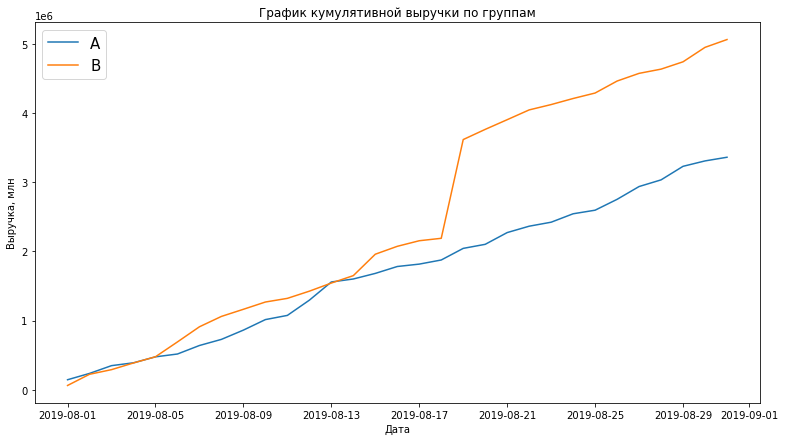

In [24]:
#создадим датафрейм с уникальными парами дат и названий групп:
dates_group = orders[['date', 'group']].drop_duplicates()

#создадим переменные с агрегированными значениями по заказам и пользователям:
orders_agg = dates_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                        orders['group'] == x['group'])]
                              .agg({'date':'max',
                                    'group':'max',
                                    'order_id':'nunique',
                                    'user_id':'nunique',
                                    'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_agg = dates_group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                        visitors['group'] == x['group'])]
                              .agg({'date':'max',
                                    'group':'max',
                                    'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

#соединим два датафрейма:
cum_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])

#сделаем срез по каждой группе:
cum_data_a_revenue = cum_data[cum_data['group'] == 'A'][['date', 'revenue', 'order_id']]
cum_data_b_revenue = cum_data[cum_data['group'] == 'B'][['date', 'revenue', 'order_id']]

#построим график кумулятивной выручки:
plt.figure(figsize=(13, 7))
plt.plot(cum_data_a_revenue['date'], cum_data_a_revenue['revenue'], label='A')
plt.plot(cum_data_b_revenue['date'], cum_data_b_revenue['revenue'], label='B')
plt.legend(fontsize=15)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн');

По графику видно, что выручка в группе В практически всегда была выше, но при этом наблюдается резкий скачок в этой группе. Скорее всего, на результат повлияли заказы на аномально большие суммы.

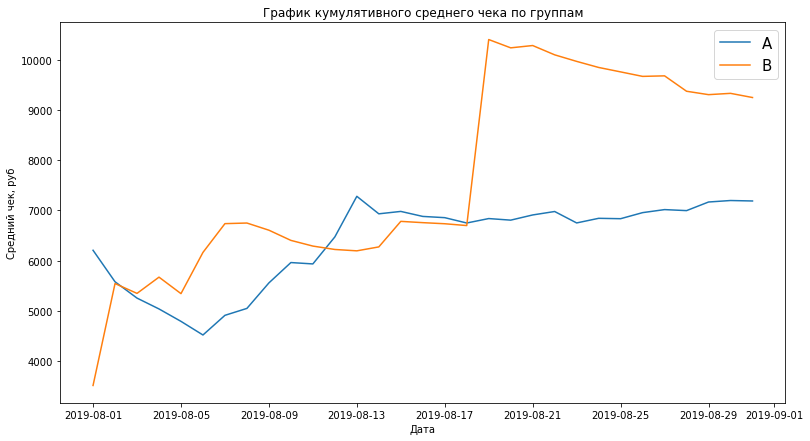

In [25]:
#построим график кумулятивного среднего чека по группам:
plt.figure(figsize=(13, 7))
plt.plot(cum_data_a_revenue['date'], 
         cum_data_a_revenue['revenue']/cum_data_a_revenue['order_id'], 
         label='A')
plt.plot(cum_data_b_revenue['date'], 
         cum_data_b_revenue['revenue']/cum_data_b_revenue['order_id'], 
         label='B')
plt.legend(fontsize=15)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб');

Здесь также виден резкий скачок среднего чека в группе В - скорее всего, в этот момент был совершен заказ на очень большую сумму. При этом можно сказать, что средний чек в группе А зафиксировался в диапазоне около 7000 рублей.

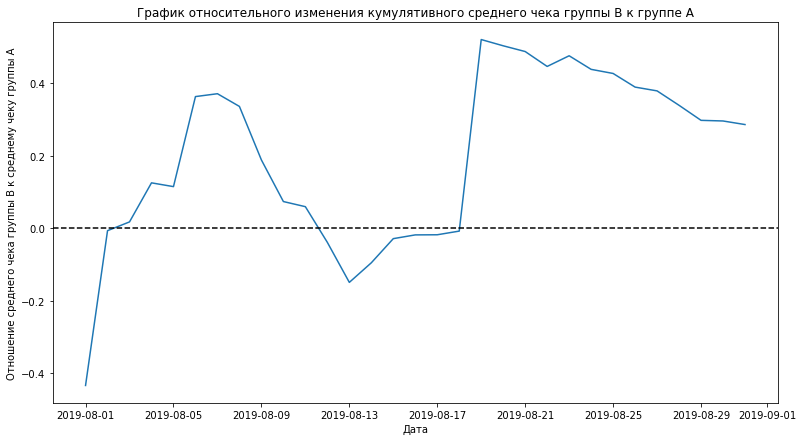

In [26]:
#построим график относительного изменения кумулятивного среднего чека группы B к группе A:
merged_cum_revenue = cum_data_a_revenue.merge(cum_data_b_revenue, 
                                              left_on='date', 
                                              right_on='date', 
                                              suffixes=['A', 'B'])
plt.figure(figsize=(13, 7))
plt.plot(merged_cum_revenue['date'], 
         (merged_cum_revenue['revenueB']/merged_cum_revenue['order_idB'])/\
         (merged_cum_revenue['revenueA']/merged_cum_revenue['order_idA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к среднему чеку группы А');

Отношение среднего чека группы В к среднему чеку группы А резко менялось несколько раз - это тоже говорит о наличии аномальных заказов.

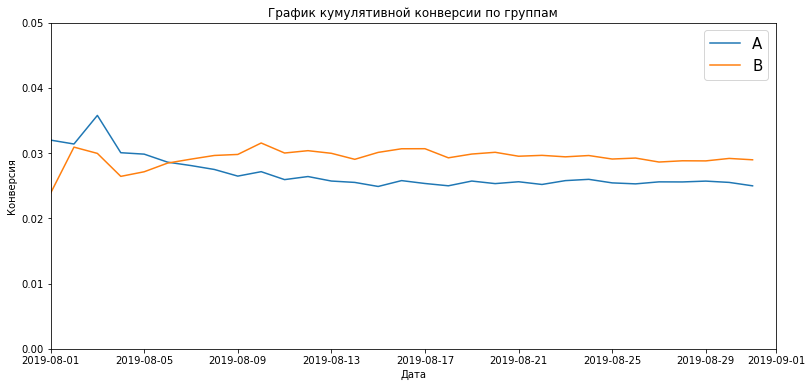

In [27]:
#создадим столбец со значением конверсии:
cum_data['conversion'] = cum_data['order_id']/cum_data['visitors']

#следаем среды по группам:
cum_data_a_conversion = cum_data[cum_data['group'] == 'A']
cum_data_b_conversion = cum_data[cum_data['group'] == 'B']

#построим график кумулятивной конверсии по группам:
plt.figure(figsize=(13, 6))
plt.plot(cum_data_a_conversion['date'], cum_data_a_conversion['conversion'], label='A')
plt.plot(cum_data_b_conversion['date'], cum_data_b_conversion['conversion'], label='B')
plt.legend(fontsize=15)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия');

В начале теста конверсии колебались в обеих группах. Но примерно через неделю конверсия в группе В стала выше, чем конверсия в группе А, и оставалась лидером до конца теста. Можно сказать, что обе конверсии зафиксировались: в группе А - на уровне 2,5%, в группе В - 3,2%.

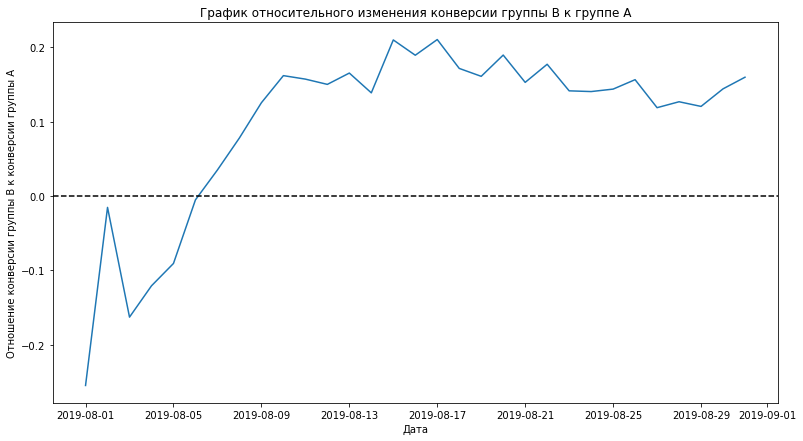

In [28]:
#соберем информацию о конверсиях в разных группах в один датафрейм:
merged_cum_conv = cum_data_a_conversion[['date', 
                                         'conversion']].merge(cum_data_b_conversion[['date', 
                                                                                     'conversion']],
                                                          left_on='date', right_on='date',
                                                          suffixes=['A', 'B'])

#построим график относительного изменения кумулятивной конверсии группы B к группе A:
plt.figure(figsize=(13, 7))
plt.plot(merged_cum_conv['date'], merged_cum_conv['conversionB']/\
                    merged_cum_conv['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии группы В к конверсии группы А');

В начале теста отношение конверсий колебалось: конверсия в группе В была то выше, то ниже, чем в группе А. Но примерно через неделю конверсия в группе В стала выше конверсии в группе А и оставалось такой до конца теста.

### Анализ выбросов

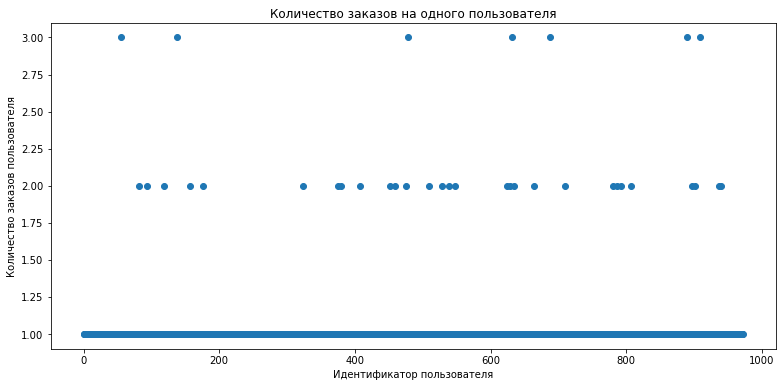

In [29]:
#подсчитаем количество заказов по пользователям:
orders_by_user = orders.groupby('user_id', as_index=False).agg({'order_id':'nunique'})
orders_by_user.columns = ['user_id', 'orders']
#построим точечный график количества заказов по пользователям:
x_values = pd.Series(range(0, len(orders_by_user)))
plt.figure(figsize=(13, 6))
plt.scatter(x_values, orders_by_user['orders'])
plt.title('Количество заказов на одного пользователя')
plt.xlabel('Идентификатор пользователя')
plt.ylabel('Количество заказов пользователя');

Большинство пользователей совершило 1 заказ. Также довольно много тех, кто совершил 2 заказа. Тех, кто совершил 3 заказа и более, совсем немного. Чтобы проверить, являются ли данные пользователи аномальными, посчитаем 90, 95 и 99 выборочные перцентили количества заказов:

In [30]:
per_orders = np.percentile(orders_by_user['orders'], [90, 95, 99])
per_orders

array([1., 1., 2.])

Не более Не более 1% совершали больше 3 заказов. Таким образом, за аномальное количество заказов на пользователя можно принять 3 и более заказов на протяжении теста.

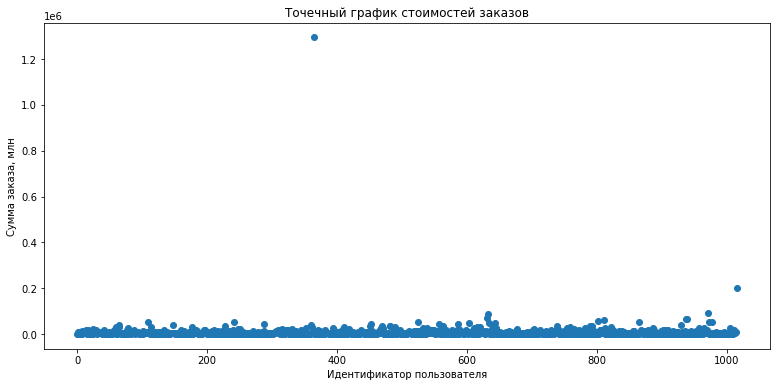

In [31]:
#построим точечный график стоимостей заказов:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(13, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Идентификатор пользователя')
plt.ylabel('Сумма заказа, млн');

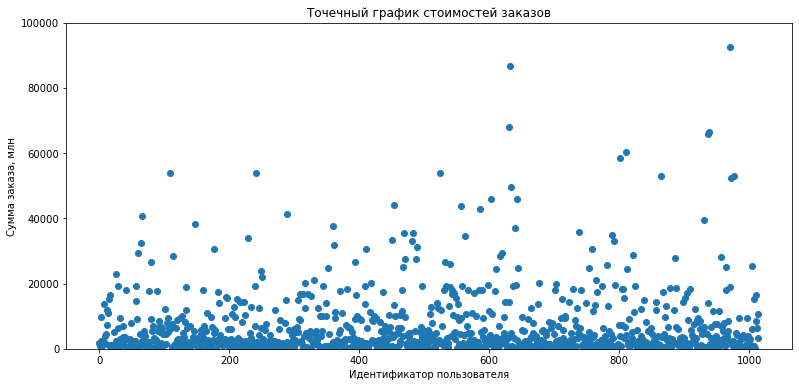

In [32]:
#изобразим тот же график, но с ограничением по оси y:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(13, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Идентификатор пользователя')
plt.ylabel('Сумма заказа, млн')
plt.ylim(0, 100000);

На графике явно видно 2 аномально больших заказа на сумму около 200000 рублей и 1,3 миллионов рублей. Посчитаем 95 и 99 выборочные перцентили выручки:

In [33]:
per_sum = np.percentile(orders['revenue'], [95, 99])
per_sum

array([26785., 53904.])

Не более 5% пользователей совершали заказы на сумму более 28000 рублей, а не более 1% - на сумму более 58233.2 рублей. Возьмем последнюю сумму за аномальное значение.

### Анализ результатов А/В теста

Проверим статистическую значимость различий в конверсии для пользователей обеих групп по сырым данным. Нулевая гипотеза в данном случае будет звучать так: "конверсия для обеих групп одинаковая", альтернативная гипотеза - "конверсия в группах А и В различается".

In [34]:
#создадим переменные с количеством пользователей по датам для каждой группы:
visits_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visits_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]

#создадим переменные с информацией о заказах:
orders_daily_a = orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']].groupby(
    'date', as_index=False).agg({'order_id': 'nunique', 'revenue':'sum'})
#
orders_daily_b = orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']].groupby(
    'date', as_index=False).agg({'order_id': 'nunique', 'revenue':'sum'})
              

#подсчитаем количество заказов по каждому пользователю:
orders_by_user_a = orders[orders['group'] == 'A'].groupby('user_id', as_index=False).agg(
    {'order_id': 'nunique'})
orders_by_user_a.columns = ['user_id', 'orders']
orders_by_user_b = orders[orders['group'] == 'B'].groupby('user_id', as_index=False).agg(
    {'order_id': 'nunique'})
orders_by_user_b.columns = ['user_id', 'orders']

#создадим переменные, где каждому пользователю будет соответствовать число его заказов:
sample_a = pd.concat(
    [orders_by_user_a['orders'], 
     pd.Series(0, index=np.arange(visits_daily_a['visitors'].sum() 
                                  - len(orders_by_user_a['orders'])), name='orders')],
    axis=0)
sample_b = pd.concat(
    [orders_by_user_b['orders'], 
     pd.Series(0, index=np.arange(visits_daily_b['visitors'].sum() 
                                  - len(orders_by_user_b['orders'])), name='orders')],
    axis=0)

#посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
display("p-value = {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
display("Относительное различие между группами - {0:.3f}".format(sample_b.mean()/sample_a.mean() - 1))

'p-value = 0.011'

'Относительное различие между группами - 0.160'

P-value меньше 0.05 - значит, различия конверсии в сырых данных между группами А и В есть. Нулевую гипотезу отвергаем. Относительное превышение конверсии в группе В над группой А составляет 13,8%.

Теперь проверим статистическу значимость различий в среднем чеке между группами по сырым данным. Нулевая гипотеза здесь - "средний чек для покупателей из обоих групп одинаковый", альтернативная - "средний чек в группах А и В различается".

In [35]:
display("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], 
                                                      orders[orders['group'] == 'B']['revenue'])[1]))
display("Относительное различие между группами \
- {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean()/
                          orders[orders['group'] == 'A']['revenue'].mean() -1))

'p-value = 0.829'

'Относительное различие между группами - 0.287'

P-value больше 0.05, а значит, оснований отвергнуть нулевую гипотезу нет. Можно считать, что средний чек у покупателей группы А не отличается от среднего чека покупателей группы В. При этом относительное различие средних чеков между группами составляет 25,9% - скорее всего, данные портят заказы на аномально большие суммы.

Теперь необходимо проверить очищенные от выбросов данные. Посмотрим, что произошло с показателями конверсии. Нулевая гипотеза здесь - "конверсия для обеих групп одинаковая", альтернативная гипотеза - "конверсия в группах А и В различается".

In [36]:
#отберем пользователей, совершивших слишком много заказов, а также тех, кто совершил слишком дорогие покупки:
many_orders_users = pd.concat([orders_by_user_a[orders_by_user_a['orders'] > per_orders[2]]['user_id'], 
                              orders_by_user_b[orders_by_user_b['orders'] > per_orders[2]]['user_id']], axis=0)
expensive_orders_users = orders[orders['revenue'] > per_sum[1]]['user_id']

#соединим всех "аномальных" пользователей вместе:
abnormal_users = pd.concat([many_orders_users, expensive_orders_users], axis=0).drop_duplicates()

display('Всего пользователей с аномальными заказами:', len(abnormal_users))

'Всего пользователей с аномальными заказами:'

16

Итого получился 31 "аномальный" пользователь. 

Проверим, как изменится статистическая значимость различий между группами по очищенным данным. Нулевая гипотеза здесь - "конверсия в обеих группах одинаковая", альтернативная - "конверсия в группах А и В различается".

In [37]:
#очистим данные по обеим группам от выбросов:
sample_a_filtered = pd.concat(
    [orders_by_user_a[np.logical_not(orders_by_user_a['user_id'].isin(abnormal_users))]['orders'], 
     pd.Series(0, index=np.arange(visits_daily_a['visitors'].sum() - len(orders_by_user_a['orders'])), 
               name='orders')], axis=0)

sample_b_filtered = pd.concat(
    [orders_by_user_b[np.logical_not(orders_by_user_b['user_id'].isin(abnormal_users))]['orders'], 
     pd.Series(0, index=np.arange(visits_daily_b['visitors'].sum() - len(orders_by_user_b['orders'])), 
               name='orders')], axis=0)

#подсчитаем статичтиечскую значимость различия конверсий по группам:
display('p-value = {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
display('Относительное различие между группами:\
 {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

'p-value = 0.007'

'Относительное различие между группами: 0.189'

P-value снова меньше 0.05, а значит, различия в конверсиях между группами А и В есть, нулевую гипотезу отвергаем. А вот относительное различие между группами увеличилось - по очищенным данным оно составило 17,4% (по сырым данным было 13,8%).

Теперь подсчитаем статистическую значимость различий в среднем чеке между группами. Нулевая гипотеза - "средний чек групп А и В одинаковый", альтернативная - "средний чек групп А и В различается".

In [38]:
#посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:
display(
'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    'Относительное различие между группами - {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'p-value = 0.788'

'Относительное различие между группами - -0.032'

Оснований отвергнуть нулевую гипотезу в данном случае нет, т.к. p-value значительно больше 0.05, то есть считаем, что различий в средних чеках между группами нет. А вот средний чек в группе В стал меньше среднего чека группы А на 2% после удаления аномалий (по сырым данным было 25,9%).

## Выводы

* среди пользователей из группы В показатель конверсии выше, чем среди пользователей из группы А, причем как по сырым, так и по очищенным данным(по сырым данным группа В лидировала на 13,8%, по очищенным - еще сильнее, на 17,4%).
* различия в средних чеках отсутствуют в обеих группах как по сырым, так и по очищенным данным. При этом на сырые данные оказывали влияние заказы на аномально большие суммы - из-за этого средний чек в группе В был выше среднего чека группы А сразу на 25,9%. По очищенным данным средний чек пользователей группы В оказался ниже на 2%.

**Исходя из сказанного выше, можно принять решение об остановке теста и зафиксировать победу группы В: конверсия в ней  выше, чем в группе А, а статистической разницы между средними чеками по группам нет.**